## Imports

In [208]:
import numpy as np
import uproot
data_dir = "/Users/weisser/MIT_Dropbox/LbVMWeisser_shared/Tracking/Simulated_Velo/LHCbPVFinding_DataSets"
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KernelDensity


In [11]:
f = uproot.open(data_dir+"/Data_ROOT/pvs_weisser.root")
f.classes()
t = f["data"]
t.keys()


['pvr_x',
 'pvr_y',
 'pvr_z',
 'hit_x',
 'hit_y',
 'hit_z',
 'hit_prt',
 'prt_pid',
 'prt_px',
 'prt_py',
 'prt_pz',
 'prt_e',
 'prt_x',
 'prt_y',
 'prt_z']

## Explore

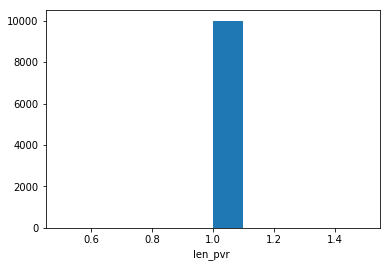

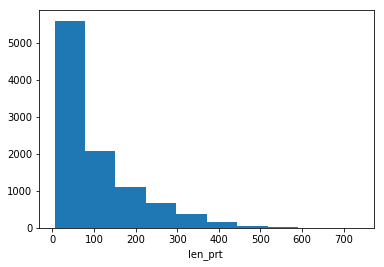

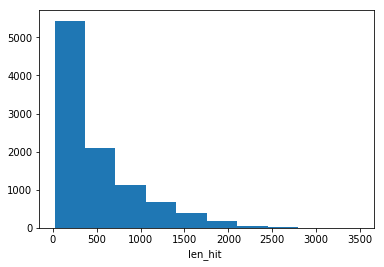

Number of events : 				10000
Average number of pvs per event : 		1.0
Average number of particles per event : 	103.2413
Average number of hits per event : 		508.2261

pvr_z : 
[[ 162.93276121],
 [ 58.44514774],
 [-32.79803724],
 ...,
 [ 125.06719003],
 [ 157.39909016],
 [ 153.89367027]] 

prt_z : 
[[ 162.93276121  162.93276121  162.93276121 ...  -82.55716777  163.2698931   163.2698931 ],
 [ 58.44514774  58.44514774  58.44514774 ...  58.44514774  58.44478239  58.44478239],
 [-32.79803724 -32.79803724 -32.79803724 ...  402.38517894  257.42278889  257.42278889],
 ...,
 [ 125.06719003  125.06719003  125.06719003 ...  201.61397577  125.06542824  125.06542824],
 [ 157.39909016  157.39909016  157.39909016 ...  157.39916006  365.5848589   365.5848589 ],
 [ 153.89367027  153.89367027  153.89367027 ...  153.89367027  194.81977851  194.81977851]] 

hit_z : 
[[ 615.99924868  660.9774781   705.98973092 ...  263.01186     324.96277484  401.98114762],
 [ 212.95756034  238.05362467  262.98961649 ... -2

In [149]:
if False:
    data_dict = t.arrays()
    len_pvr = [len(i) for i in data_dict["pvr_z"]]
    len_prt = [len(i) for i in data_dict["prt_z"]]
    len_hit = [len(i) for i in data_dict["hit_z"]]



    plt.hist(len_pvr)
    plt.xlabel("len_pvr ")
    plt.show()

    plt.hist(len_prt)
    plt.xlabel("len_prt ")
    plt.show()

    plt.hist(len_hit)
    plt.xlabel("len_hit ")
    plt.show()

    print "Number of events : \t\t\t\t", len(data_dict["pvr_z"])
    print "Average number of pvs per event : \t\t", np.average([len(i) for i in data_dict["pvr_z"]])
    print "Average number of particles per event : \t", np.average([len(i) for i in data_dict["prt_z"]])
    print "Average number of hits per event : \t\t", np.average([len(i) for i in data_dict["hit_z"]])

    print "\npvr_z : \n", data_dict["pvr_z"], "\n\nprt_z : \n", data_dict["prt_z"], "\n\nhit_z : \n", data_dict["hit_z"] 

In [159]:
if False:
    # I don't understand the uproot tree iterate method
    counter = 0
    for hit_x,hit_y,hit_z in t.iterate(["hit_x","hit_y","hit_z"], outputtype=tuple):
        if True:
            print hit_z
            print len(hit_z)
            print len(hit_z[0])
            print "hasdbasd\n\n"
        counter +=1
    print "counter : ", counter

hi
1.57079632679
[[ 615.99924868  660.9774781   705.98973092 ...  263.01186     324.96277484  401.98114762],
 [ 212.95756034  238.05362467  262.98961649 ... -238.97666423 -264.02879495 -289.00756624],
 [-202.00389311 -226.96578091 -251.98211715 ...  661.028483    706.04419915  750.97744527],
 [-143.98183773 -213.98853797 -238.98937394 ...  660.95873349  706.01081627  751.0504092 ],
 [ 750.9802773   101.01220995  126.00438002 ...  648.98197347  694.0066015   738.97468661],
 [ 603.98575125  649.02063653  693.96425554 ... -227.03720604 -251.91888507 -276.99463695]]
6
1463
hasdbasd


hi
1.57079632679
[[ 75.98757596  51.02979021  25.96580838 ...  238.00237012  262.99088469  325.03805245],
 [-12.00874052 -37.02144478 -61.96283475 ...  112.98598204   63.01427974   88.00280567],
 [ 312.9903392   390.02624705  484.9872297  ...  87.99712332  88.00249806  76.00232059],
 [ -48.96329099  -73.96896997 -143.97480946 ... -144.04160733  -11.97580077  -36.96771141],
 [ -49.01054223  -74.02900291 -143.96

[[-263.93030626 -289.00897517  390.01120528 ... -11.98305086  50.97464618  26.01102694],
 [ 705.97671184  750.98675884  324.98453718 ...  237.99781635  262.98056471  325.00628816],
 [ 26.02973126   1.00326552 -23.9962746  ...  175.96687048  200.97645944  226.03021395],
 [ 661.00535258  705.99956429  751.02927281 ... -239.03749566 -264.00689535 -288.99176497],
 [ 312.99699105  325.00204438  402.01631411 ... -288.96430215 -264.05103963 -288.98078805]]
5
131
hasdbasd


hi
1.57079632679
[[ 616.03169054  660.99876348  705.99197136 ... -226.97697683 -252.03314941 -276.98680998],
 [  38.04010025  101.02156024  126.01163963 ...  213.04289587  238.00518852  263.01918674],
 [ -49.00956222  -73.96691001  175.97580937 ... -226.98307669 -251.98324659 -277.01070626]]
3
180
hasdbasd


hi
1.57079632679
[[-12.01133183 -36.98251342 -61.95419769 ...  200.99280377  226.01631602  250.98229752],
 [-131.99967126 -202.04438992 -227.02020937 ... -143.97680398 -213.9952053  -238.95253538],
 [-201.97587282 -227.

7
427
hasdbasd


hi
1.57079632679
[[ 26.05883295   0.96961724 -24.04204094 ... -227.00055535 -252.0169796  -276.99349452],
 [ 496.93888123  615.99845074  661.00770785 ...  661.03109164  706.02927104  751.0066708 ],
 [ 660.98999604  706.0060533   751.01420304 ...  648.99374148  163.02504715  151.07541242],
 [ 138.03481295  162.98597572  187.98062629 ...  12.96645402 -11.98367818  63.01189637],
 [ 162.97034416  187.99512391  212.9944361  ... -11.94718857 -36.99151154 -62.02691095],
 [ 188.01465033  212.98167207  238.0150793  ... -226.99156593 -252.0447504  -276.99767114],
 [ 13.01699285 -11.96652399 -37.00919609 ... -238.99742307 -264.02395579 -289.0164016 ]]
7
156
hasdbasd


hi
1.57079632679
[[ 51.00853518  25.95695856  62.99626142 ...  125.98287723  101.05146978  125.99700509],
 [-132.03434844 -202.00433776 -227.01764787 ...  37.95901667  62.9439039   87.95795746],
 [ 200.9724971   175.98389772  200.96045647 ...  151.02876154  175.96749837  151.00626518],
 [ 162.98960506  188.02525292 

hi
1.57079632679
[[ 389.96651278  484.99909522  604.00665563 ... -37.00675843 -61.99025423   1.01915443],
 [-289.01277478 -132.0227969  -201.94961335 ...  225.97291104  250.98387343  313.0146481 ],
 [-12.01009896 -37.04413549 -62.03182223 ...  661.02486659  706.00810561  750.98091349],
 [ 615.99109903  661.01742022  705.99616276 ...  484.97917616  389.9927022   484.9767577 ],
 [ 163.00454639  175.98437542  201.02350822 ... -226.98010877 -252.01262264 -276.97558784]]
5
166
hasdbasd


hi
1.57079632679
[[ 112.99303853  125.97825877  150.99954095 ...  -36.98148004  -62.03246927 -132.0372622 ],
 [ 151.02880642  176.00281898  200.9865627  ... -226.95312612 -252.01786895 -277.02960014],
 [-202.01841433 -226.97117872 -251.93745676 ...  313.04218952  389.97394721  485.01559704],
 [ 37.96545526  12.9904222  -12.01561629 ...  312.98988738  389.97599622  484.98988346],
 [ 38.01814276  12.96435776 -11.99056588 ...  649.06092414  693.97481962  738.96784216],
 [ 137.97636544  162.98672591  187.942170

hi
1.57079632679
[[ 251.03843198  313.00431049  389.98028536 ...  660.99342998  705.9975669   751.01335954],
 [ -36.977083    -61.96862123 -132.01225113 ...  706.0156761   750.99710198  738.98441076],
 [ 649.00431693  694.00712358  739.00031949 ...   26.01940615  138.01153871  112.97938311],
 [ 100.9826989   125.97064516  150.9924     ...  251.02587522   62.98335832   87.97944312],
 [  76.06340763  100.98506717  125.98547962 ...  496.96391522 -251.98968395 -277.00529487],
 [   1.00778137  -24.04795523  187.98960243 ... -49.02655753 -74.0039815   25.9914823 ],
 [ 150.96530022  175.9767354   200.97222397 ...  263.03953492  324.98045018  402.04097496],
 [-11.98213014  13.00995911  38.02220705 ...  389.97327774  484.98992545  604.01503323],
 [ 12.97073353  13.01629405 -12.03588676 ...   87.95509858  113.02228167  138.01412139]]
9
1114
hasdbasd


hi
1.57079632679
[[ -49.01000896  -74.00600326 -144.06827302 ... -131.97349324 -202.00313807  188.0063    ],
 [-289.02953077 -202.01575215 -226.98

hi
1.57079632679
[[ 25.98624574  25.96076982  63.00714734 ...   1.01469861 -24.00413317 -49.01962654],
 [ 325.01170365  402.01160881  496.98053015 ...  661.01822754  706.00238231  751.0187906 ],
 [ 401.98336197  496.99809882  615.99089176 ...  648.97817564  693.99923631  738.98731888],
 [ 615.97162676  660.98327293  705.97634453 ...  238.02184691  263.02279958  324.97570306],
 [-252.01341824 -276.99333429 -251.98038533 ...  660.95309911  705.9767142   751.00819299],
 [ 313.00916205  389.9765231   484.99057967 ...  101.02100101   75.98464607   50.9860621 ],
 [ 113.05055788  137.98463474  162.99546994 ... -24.02059136 -49.0139798  -73.98898659]]
7
1292
hasdbasd


hi
1.57079632679
[[ 313.02671849  390.00074785  484.98132625 ... -264.00504218  163.01878597  188.02857772],
 [ 263.03371951  324.98793873  402.02435701 ...  615.9667419   661.01264573  705.95931964],
 [-238.98002556 -264.00985571 -288.97846408 ...  201.02283346  213.02070227  237.98895633],
 [ 324.99751633  401.98199625  496.98

hi
1.57079632679
[[ 497.02884372  616.0100808   661.00709145 ...  200.97669691  225.98639529  250.98356182],
 [ 150.97816502  176.0277341   200.97162786 ...  648.96122859  693.97116718  738.98343891],
 [ 126.0311014   151.00473026  137.97570139 ...  485.00960092  604.01456503  649.02386778],
 [-131.99160496  -23.98445961    0.98566556 ...  312.96572004  390.06568028  484.98057205],
 [ -49.02133561  -74.04416116 -143.96963152 ...  38.03247885  13.00969625 -11.97799402],
 [ 101.00883409  126.03132924  150.99704747 ...   37.96073508 -277.01706414 -277.01152228]]
6
497
hasdbasd


hi
1.57079632679
[[-61.98885545 -49.02338447 -74.02785384 ...  37.97352441  62.97898628  88.035347  ],
 [ 175.9830923   201.06790157  225.98559074 ... -263.98600666 -288.98625046  -48.97285523],
 [ 389.99523708  484.98307556  603.98806041 ... -144.04404116 -214.03903154 -239.01112003],
 [ 603.97747131  648.99683113  693.99900423 ...  213.00610151  237.98860181  263.01404128],
 [ 226.02983602  250.9701621   313.020

hi
1.57079632679
[[ 162.97206047  188.01928029  213.01372494 ...  162.99580956  188.01489391  213.04830095],
 [ 162.9451839   188.00148527  213.03632824 ...  313.02352318  390.02435678  485.02694773],
 [ 313.00341774  390.03441837  313.00122798 ...  649.03762232  694.00148426  738.95324221],
 [ 151.02278714  175.98999606  201.02186246 ...  201.04722337  226.00770515  251.02135721],
 [ 137.96015731  175.94462323  200.99738012 ...  25.98711928  50.98401685  26.0001016 ],
 [ 496.97774228  615.98184132  660.99162505 ... -226.97464402 -252.00061466 -276.98531388],
 [-202.00912165 -226.99368138 -252.00219873 ...  402.02274416  496.99441351  615.96694013],
 [ -61.95999481 -131.94898296 -202.01217206 ... -227.02850466 -251.98442842 -277.02799485],
 [ 63.00203598  51.02768106  26.00842241 ... -144.02922453 -144.02359218 -213.99178364],
 [ 138.02301003   88.00442348   63.0074234  ... -226.99898633 -251.99342141 -277.04570345]]
10
239
hasdbasd


hi
1.57079632679
[[ 188.00668217  213.00168217  237

hi
1.57079632679
[[ 100.98690396   76.01918852   51.01110723 ...  112.98185867   88.05231208   63.0229858 ],
 [ 63.05107113  37.99543404  12.95539295 ...  648.98727169  694.02689978  739.02344382],
 [ 389.98687719  485.04704664  604.00499894 ...  137.98355348  113.0078637    88.00909016],
 [ 175.99116964  201.03826652  226.03166619 ... -226.97560236 -252.02738671 -276.99585972],
 [-11.96231082 -37.00036744   0.96518433 ... -11.98522208 -37.00775228 -61.98613885],
 [ 101.0151726   100.97714656  138.01646805 ...  312.96557315  390.01565911  484.95872858],
 [ 26.00762015   0.98364985 -24.00948764 ...  -48.9849445   -74.02120344 -144.02059084],
 [-144.00601173 -213.99081106 -239.0234802  ... -11.97830266 -37.0145844   12.99150225],
 [ 750.96333893  616.01635707  660.99704142 ...   0.98710565 -23.9892513  -49.01094261]]
9
1037
hasdbasd


hi
1.57079632679
[[ 13.01388223 -11.99209292  25.99183404 ...  225.95158776  251.0040223   312.99169142],
 [ 12.98510694  13.0069394   13.00478763 ...  125

hi
1.57079632679
[[-62.00465623 -62.06472084 -62.00999689 ...  389.99986451  497.01278298  615.96925955],
 [-251.97071535 -277.00238575 -251.96574505 ... -226.98295601 -252.02760746 -277.02435304],
 [ 100.96739115  113.03446772  100.9693149  ...  125.98667411  150.92060754  126.00870764],
 [ 100.97423893   76.04843378  137.94262465 ...  660.99141514  706.01986886  750.97624166],
 [ 151.01520038  126.0208576   151.00965634 ...  151.01759212  125.95933335  101.01637176],
 [-201.98541075 -227.02423117 -252.02196263 ... -226.97350179 -251.96560324 -277.01226386],
 [ 250.97468647  313.01678638  389.98014572 ... -201.9818092  -226.97683323  176.0081186 ]]
7
566
hasdbasd


hi
1.57079632679
[[ 26.01740906   0.94531432 -24.01421775 ... -23.9552681  -49.02168171 -73.99682891],
 [ 616.04287896  660.98001021  706.00608559 ... -238.99994551 -263.99682621 -288.9746621 ],
 [ 137.96416598  162.96894363  188.01511984 ...  648.99370632  694.00205642  738.98976886],
 [  87.97662755  112.98258527   87.959

hi
1.57079632679
[[ 312.9665754   390.02531599  484.96367061 ... -289.00132709 -251.99571047 -277.01055387],
 [ 12.99561095  38.02389047  63.02120989 ... -288.97300846 -264.00531691 -288.98311065],
 [ 101.00241328   75.98232363   51.03539578 ...  213.04294466  238.03677813  263.00116073],
 [ 705.99159396  751.01492052  615.99172165 ... -62.01677616 -49.02053811 -73.97979621],
 [ -24.03838939  -62.02663769 -131.97345298 ... -144.05311628  -48.99817184  -74.01021614],
 [ 262.98794071  324.95047297  402.04130209 ...  100.99461485  138.03322542  163.00411124],
 [ 26.04827203 -24.04438431 -24.01527841 ...  163.00716629   13.02116615   37.990672  ]]
7
555
hasdbasd


hi
1.57079632679
[[ 162.99327569  138.00122649  113.01399665 ... -238.9865276  -264.02512655 -289.00642551],
 [ 63.02354627  37.94341776  12.98302479 ... -144.08213782 -144.03322863 -213.99471493],
 [ 125.99400446 -238.99916327 -263.99698597 ... -277.04400631  112.9972289   101.00990223],
 [ 200.99021515  226.03522095  250.999658

hi
1.57079632679
[[-131.97119293 -201.99256443 -227.00096128 ...  694.02937245  739.02348941 -288.97413904],
 [ 150.99644453  125.96057213  125.97963513 ...  101.00604144   75.98005447   50.98530426],
 [ -36.98725396  -61.98075322 -132.00046286 ... -202.00132395 -227.03114975 -251.96978452],
 [-238.99616739 -264.04027655 -289.02745044 ... -238.96051618 -263.9979573  -289.02439606],
 [ 13.01008617 -11.97873911 -37.01405948 ... -201.98866096   50.98840389   26.01048574],
 [ 112.96989829   51.01527019   26.00678899 ...  313.00168422  389.99251075  312.99654491],
 [ 312.95971667  389.99933413  485.00662653 ...  226.00921048  250.93959112  312.96070047],
 [ 37.96434637  26.01342268   0.98699602 ... -226.95572107 -252.01591954 -277.00091462],
 [  75.99843896  101.00456699  126.00464217 ... -23.96551783 -48.99260852 -74.00530523],
 [ 63.02079481  37.98929028  63.03279003 ...  225.99763359  251.00976883  225.98573844]]
10
212
hasdbasd


hi
1.57079632679
[[ 390.02778995  484.94128928  604.04031

hi
1.57079632679
[[ 751.00777529  661.04090578  706.04026067 ...  751.01879012  705.9804219   751.01286324],
 [ -48.97612364  -74.00038082 -143.97510092 ... -264.02083691 -289.01129954  112.9828135 ],
 [  63.01886583  603.96890006  648.98547182 ...  649.05030862  694.0282663   738.99076282],
 ...,
 [ 603.98467719  648.98347113  693.9957175  ... -239.00687634 -263.99401941 -289.01165959],
 [ 738.93027616   13.06778597  -24.02220947 ...  390.00453386  485.04594019  390.05364665],
 [ 693.9609986   739.01988064  648.94716201 ...  649.01880016  693.94940355  738.97201293]]
835
260
hasdbasd


counter :  271


In [209]:
# Simple (2D) Linear Regression. Gaussian uncertainties of std dev beta in y variable. No uncertainties in x variable
# As proxy for x intercept uncertainty take the distance from the x intercept at which the y distance from the x axis 
# corresponds to one standard dev in y (beta).
# If y = m * x + c
# Intercept is at - c / m
# Intercept uncertainty proxy is beta / m

# Look at http://science.widener.edu/svb/stats/regress.html

def linear_regression(x, y):
    
    X = np.array([x]).T
    train_features = X
    train_target = y

    
    if False:
        w = np.dot(train_features.T, train_features)  
        w1 = np.dot(np.linalg.pinv(w), np.dot(train_features.T,train_target))
    
    if False:
        mean_x = np.mean(x);   mean_y = np.mean(y);
        B1 = sum((x(i) - mean_x) * (y(i) - mean_y)) / sum( (x(i) - mean_x)^2 )
        B0 = mean(y) - B1 * mean(x)
        
        beta = 1
        print w1
    
        c = w1[0]
        m = w1[1]
        intercept = - c / m
        intercept_uncertainty = beta / m 
    
    
    if False:
        a = np.linalg.inv(np.dot(X.T,X))
        c = np.dot(X.T,Y)
        b = np.dot(a,c)


    if True:
        mean_x = np.mean(x);   mean_y = np.mean(y);
        N = len(y)
        assert N == len(x)
        s_xx = sum([(x[i]-mean_x)*(x[i]-mean_x) for i in range(N)])
        s_yy = sum([(y[i]-mean_y)*(y[i]-mean_y) for i in range(N)])
        s_xy = sum([(x[i]-mean_x)*(y[i]-mean_y) for i in range(N)])
        
        #print s_xx, s_yy, s_xy
        
        m = s_xy / s_xx
        c = mean_y - m * mean_x
        intercept = mean_x - mean_y / m
        
        #print "m, c, intercept : \t", m, c, intercept
        
        beta = N / sum([(y[i]- c - m*x[i])*(y[i]- c - m*x[i]) for i in range(N)])
        
        s_r = np.sqrt((s_yy - np.square(m)*s_xx)/(N-2) )
        s_y = s_r * np.sqrt(1+1./N + (x-mean_x)**2/s_xx) 
        #s_x = s_r/m * sqrt(1./M + 1./N + (y_unk-mean_y)**2/(m**2*s_xx))
        #print beta
        #print s_r, np.mean(s_y)
        
        beta = np.mean(s_y) #This is not actually correct
        
    
    
    
    
    
    
    intercept_uncertainty = beta / m 
    
    
    return intercept, intercept_uncertainty
    

In [138]:
#Testing the linear regression function
if False:
    
    if True:
        l = [1, 2, 3, 4 ]

        x_train = np.array(l)
        y_train = np.array([2*i + 1 + np.random.normal(loc=0., scale=0.001) for i in l])

    else:
        l = [1, 2, 3, 4 ]
        l1 = [1.5, 2.5]

        x_train = np.array(l+l1)
        y_train = np.array([2*i + 1 + np.random.normal(loc=0., scale=0.001) for i in l] +
                          [3*i + 0.5 + np.random.normal(loc=0., scale=0.001) for i in l1])


    #X_train = np.c_[1, 2, 3, 4 ].T
    #y_train = [3, 5, ]
    X_test = np.c_[0, 2].T
    linear_regression(x_train, y_train)


m, c, intercept : 	2.00012161174 1.00010000625 -0.500019599


(-0.50001959900041371, 0.00067352054345624099)

## Fill Bins

In [199]:
#OLD inefficient
if False:
    # 0.1 milliradian corresponds to 63000 bins
    binning_scheme = [[10, 0],[10, 0.5]]
    # 10, 0.5 means you divide 2 pi into 10 bins. the offset is 0.5 times a bin
    bin_contents = []
    for n_binning_scheme, (nbins, offset_bin_frac) in enumerate(binning_scheme):
        bin_contents.append([])
        for _ in range(nbins):
            bin_contents[n_binning_scheme].append([])


    counter = 0
    #for i in range(len(data_dict["hit_x"])):
    for i in range(1):
        counter += 1
        hit_phi = np.arctan2(data_dict["hit_y"][i], data_dict["hit_x"][i])
        hit_r   = np.sqrt(np.square(data_dict["hit_y"][i]) + np.square(data_dict["hit_x"][i]))
        #print hit_phi


        for n_binning_scheme in range(len(binning_scheme)):
            nbins, offset_bin_frac = binning_scheme[n_binning_scheme][0], binning_scheme[n_binning_scheme][1]
            #vectorised and no bin definitions necessary
            hit_phi_obs = hit_phi - 2.*np.pi*offset_bin_frac/nbins  #Rotating the bins with angle alpha is the same as rotating the point with angle - alpha
            hit_phi_obs = hit_phi_obs % (2 * np.pi ) # taking care of modulo
            hit_bins = (hit_phi_obs //(2 * np.pi / nbins)).astype(int)


            #print hit_phi_obs
            #print len(hit_bins), hit_bins

            for j, b in enumerate(hit_bins):
                bin_contents[n_binning_scheme][b].append([data_dict["hit_z"][i][j], hit_r[j]])

    print counter
    print bin_contents






In [268]:
# 0.1 milliradian corresponds to 63000 bins
binning_scheme = [[10, 0],[10, 0.5]]
binning_scheme = [[63000, 0],[63000, 0.5]]
# 10, 0.5 means you divide 2 pi into 10 bins. the offset is 0.5 times a bin
bin_contents = []
for n_binning_scheme, (nbins, offset_bin_frac) in enumerate(binning_scheme):
    bin_contents.append({})



counter = 0
#for i in range(len(data_dict["hit_x"])):
for i in range(1):
    counter += 1
    hit_phi = np.arctan2(data_dict["hit_y"][i], data_dict["hit_x"][i])
    hit_r   = np.sqrt(np.square(data_dict["hit_y"][i]) + np.square(data_dict["hit_x"][i]))
    #print hit_phi
    

    for n_binning_scheme in range(len(binning_scheme)):
        nbins, offset_bin_frac = binning_scheme[n_binning_scheme][0], binning_scheme[n_binning_scheme][1]
        #vectorised and no bin definitions necessary
        hit_phi_obs = hit_phi - 2.*np.pi*offset_bin_frac/nbins  #Rotating the bins with angle alpha is the same as rotating the point with angle - alpha
        hit_phi_obs = hit_phi_obs % (2 * np.pi ) # taking care of modulo
        hit_bins = (hit_phi_obs //(2 * np.pi / nbins)).astype(int)
        

        #print hit_phi_obs
        #print len(hit_bins), hit_bins

        for j, b in enumerate(hit_bins):
            #bin_contents[n_binning_scheme][b].append([data_dict["hit_z"][i][j], hit_r[j]])
            if b in bin_contents[n_binning_scheme]:
                bin_contents[n_binning_scheme][b].append([data_dict["hit_z"][i][j], hit_r[j]])
            else:
                bin_contents[n_binning_scheme][b]=[[data_dict["hit_z"][i][j], hit_r[j]]]
                

print counter
print bin_contents

1
[{52224: [[615.9730907685589, 36.046999903383465]], 20482: [[-263.97034533842236, 21.769011279350934]], 57348: [[324.97386360212693, 20.408581989675273]], 12294: [[62.969464977690947, 32.92599500299422]], 24584: [[-143.96937673405046, 7.5677822838181044]], 14089: [[-48.964385293482337, 9.2051117977660954]], 57355: [[263.00275501629801, 7.7757564272528645]], 26637: [[738.98964577858567, 27.929563044659453]], 20494: [[-73.978960478958072, 12.075813689253842]], 57361: [[497.01912091856912, 42.076018544770236]], 12306: [[88.022436965909307, 15.395458388502224]], 20500: [[-213.97502864071993, 19.247712997516146]], 21166: [[313.01769754150882, 33.967658257014833]], 20504: [[-238.95870243890676, 20.474550119582261]], 40987: [[151.01224192277485, 22.120452061674357]], 20508: [[-49.028851685867885, 10.821336667180184]], 51790: [[705.9860681432416, 17.013262461425981]], 20510: [[-143.97273104029009, 15.720985031039731]], 53739: [[402.01851546438934, 27.013034534208217]], 38353: [[-48.993329842

## Do regression

In [281]:
kernel_inputs_orig = []
for n_binning_scheme, (nbins, offset_bin_frac) in enumerate(binning_scheme):
    kernel_inputs_orig.append([])

n_skipped = 0
n_total   = 0

for n_binning_scheme in range(len(binning_scheme)):
    nbins, offset_bin_frac = binning_scheme[n_binning_scheme][0], binning_scheme[n_binning_scheme][1]
    for key in bin_contents[n_binning_scheme]:
        n_total +=1
        data = np.array(bin_contents[n_binning_scheme][key])
        if (data.shape[0] < 3): n_skipped+=1; continue
        intercept, intercept_uncertainty = linear_regression(data[:, 0], data[:,1])
        print " intercept, intercept_uncertainty  : ", intercept, intercept_uncertainty
        kernel_inputs_orig[n_binning_scheme].append([intercept, intercept_uncertainty])
        
print kernel_inputs_orig

print "n_skipped / n_total : ", n_skipped, " / ", n_total

 intercept, intercept_uncertainty  :  175.423246033 -1.54767783146
 intercept, intercept_uncertainty  :  -1661.15608634 1195.987673
 intercept, intercept_uncertainty  :  163.04407422 -0.100973631548
 intercept, intercept_uncertainty  :  -491.246978098 136.186644479
 intercept, intercept_uncertainty  :  2630.57578778 -1440.27037505
 intercept, intercept_uncertainty  :  162.884586878 0.239745671513
 intercept, intercept_uncertainty  :  162.599019941 -0.300563751491
 intercept, intercept_uncertainty  :  161.189712467 -0.152367871055
 intercept, intercept_uncertainty  :  -491.246978098 136.186644479
 intercept, intercept_uncertainty  :  -1243.78228043 144.934876313
 intercept, intercept_uncertainty  :  -82.2627613804 67.6170851223
 intercept, intercept_uncertainty  :  162.913485513 -0.0131265649426
[[[175.42324603298897, -1.5476778314560578], [-1661.1560863428042, 1195.9876729971572], [163.04407422015575, -0.10097363154771127], [-491.24697809789677, 136.1866444785903], [2630.5757877753113,

## Kernel Density Estimation

[[  1.75423246e+02  -1.54767783e+00]
 [ -1.66115609e+03   1.19598767e+03]
 [  1.63044074e+02  -1.00973632e-01]
 [ -4.91246978e+02   1.36186644e+02]
 [  2.63057579e+03  -1.44027038e+03]
 [  1.62884587e+02   2.39745672e-01]
 [  1.62599020e+02  -3.00563751e-01]
 [  1.61189712e+02  -1.52367871e-01]
 [ -4.91246978e+02   1.36186644e+02]
 [ -1.24378228e+03   1.44934876e+02]
 [ -8.22627614e+01   6.76170851e+01]
 [  1.62913486e+02  -1.31265649e-02]]
kernel_inputs.shape :  (12, 2)


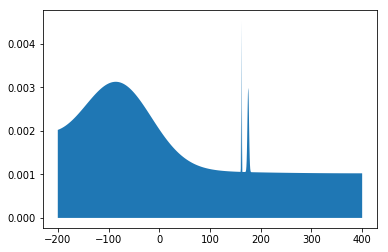

In [284]:
# Neither scipy.stats (gaussian_kde) not sklearn implementations allow to vary bandwidth on a per entry level
# Had to implement it myself

x_plot = np.linspace(-200, 400, 1200)
#x_plot = np.linspace(-200, 400, 5)
y_plot = np.zeros(len(x_plot))
#X_plot = np.linspace(-200, 400, 1200)[:, np.newaxis]

kernel_inputs = []
for i in kernel_inputs_orig: kernel_inputs.extend(i)    #flatten binning scheme

kernel_inputs = np.array(kernel_inputs)
print kernel_inputs
print "kernel_inputs.shape : ", kernel_inputs.shape
#print kernel_inputs


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

for i in range(kernel_inputs.shape[0]):
    y_plot += gaussian(x_plot, kernel_inputs[i,0], kernel_inputs[i,1])
    
    
#Normalise
# Compute the area using the composite trapezoidal rule.
area = np.trapz(y_plot, dx=(x_plot[1]- x_plot[0]))
#area = np.trapz(y_plot, dx=1./len(y_plot)) #Assuming x_max - x_min is 1
y_plot = y_plot/ area
#y_plot = y_plot/ np.linalg.norm(y_plot)


plt.fill_between(x_plot, 0, y_plot)







